# Deep Belief Modeling
Project for SI course

## Imports

In [35]:
import string

import pandas as pd
import re
from nltk import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## Loading data

In [36]:
df_train = pd.read_csv("resources/data.csv", sep="\t")
# maybe add test data in future

## Input data visualisation

<AxesSubplot:>

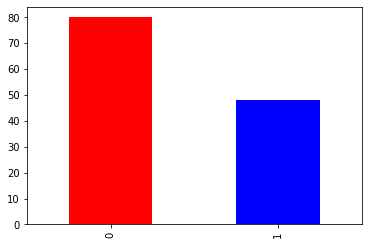

In [37]:
x = df_train["label"].value_counts()
x.plot(kind="bar", color=["r", "b"])

## Text pre-processing for classification

In [45]:
# nie dziala

def remove_punctuation(text):
    return "".join([c for c in text if c not in string.punctuation and c != "’" and c != "—"])

def remove_special_characters(text):
    return text.replace(r'[^A-Za-z0-9 ]+', '')

def remove_numbers(text):
    return re.sub('\d+', '', text)

def tokenization(text):
    return word_tokenize(text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [w for w in text if w not in stop_words]

def lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(w) for w in text]

def text_preprocessing(text):
    text = remove_punctuation(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = text.lower()
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

In [52]:
# https://stackoverflow.com/a/54398984
# prawie dziala

from nltk import RegexpTokenizer

wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('\d+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemma_words = [wordnet_lemmatizer.lemmatize(w) for w in filtered_words]
    return lemma_words

In [53]:
print(df_train["data"].head(10))
print(df_train["data"].apply(text_preprocessing).head(10))

preprocessed_data = df_train["data"].apply(text_preprocessing)

0    It's been quite a week. I've been in the media...
1    This week has been eye-opening. Even for me --...
2    Yes, it's true. I beat COVID-19 in 48 hours wi...
3    The COVID-19 vaccines appear to be causing a g...
4    Back in the 1980s, I was a Columbia University...
5    So you got the vaccine because they told you t...
6    I Am A Living Proof That COVID-19 Is Fake This...
7    I have a PhD in virology and immunology. I’m a...
8    How do you convince the world’s population to ...
9    Take 15 minutes and listen to this interview w...
Name: data, dtype: object
0    [quite, week, ive, medium, business, decade, i...
1    [week, eyeopening, even, im, guy, warned, year...
2    [yes, true, beat, covid, hour, ivermectin, get...
3    [covid, vaccine, appear, causing, global, heal...
4    [back, columbia, university, student, learning...
5    [got, vaccine, told, get, forced, get, joe, bi...
6    [living, proof, covid, fake, unfiltered, take,...
7    [phd, virology, immunology, im, cl

## Feature selection

### TF-IDF Vectorizer

In [56]:
# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

count_vectorizer = CountVectorizer(tokenizer=preprocess)
tfidf_vectorizer = TfidfVectorizer(tokenizer=preprocess)

count_wm = count_vectorizer.fit_transform(df_train["data"])
tfidf_wm = tfidf_vectorizer.fit_transform(df_train["data"])

count_tokens = count_vectorizer.get_feature_names_out()
tfidf_tokens = tfidf_vectorizer.get_feature_names_out()

print(count_tokens)
print(tfidf_tokens)

df_count_vect = pd.DataFrame(data=count_wm.toarray(), columns=count_tokens)
df_tfidf_vect = pd.DataFrame(data=tfidf_wm.toarray(), columns=tfidf_tokens)

print("Count vectorizer")
print(df_count_vect)
print("Tf-idf vectorizer")
print(df_tfidf_vect)

['________________________________________________________________________'
 'aabduzrw' 'aaby' ... 'zoster' 'zuckerberg' 'zurich']
['________________________________________________________________________'
 'aabduzrw' 'aaby' ... 'zoster' 'zuckerberg' 'zurich']
Count vectorizer
     ________________________________________________________________________  \
0                                                    0                          
1                                                    0                          
2                                                    0                          
3                                                    0                          
4                                                    0                          
..                                                 ...                          
123                                                  0                          
124                                                  0                   